In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [3]:
data=pd.read_csv('./项目二二手房数据.csv',index_col=0)
data.columns

Index(['街道', '朝向', '官方核验', '公寓', '独立阳台', '近地铁', '押一付一', '独立卫生间', '集中供暖',
       '双卫生间', '精装', '随时看房', '拎包入住', '新上', '是否月租', '室数', '厅数', '卫数',
       '租价：元/平方米/月', '总楼层数', '租赁方式_合租', '租赁方式_整租', '租赁方式_第三人民医院家属院 3室2厅 南/北',
       '区_临潼', '区_新城区', '区_未央', '区_灞桥', '区_碑林', '区_莲湖', '区_蓝田', '区_西咸新区（西安）',
       '区_鄠邑区', '区_长安', '区_雁塔', '区_高陵', '楼层高低_中楼层', '楼层高低_低楼层', '楼层高低_地下室',
       '楼层高低_高楼层'],
      dtype='object')

In [2]:
pd.read_csv('链家二手房房源.csv',index_col=0)

,小区名,租赁方式,房屋链接,租价：元/月,区,街道,面积,朝向,户型,楼层高低,...,近地铁,押一付一,独立卫生间,集中供暖,双卫生间,精装,随时看房,拎包入住,新上,是否月租
0,西北有色地质研究院生活小区,整租,https://xa.lianjia.com/zufang/XA17040883923309...,1600.0,雁塔,城东,50.00㎡,东南,2室1厅1卫,高楼层,...,0,0,0,1,0,1,0,0,0,0
1,旭景碧泽园,合租,https://xa.lianjia.com/zufang/XA17769417354741...,1300.0,雁塔,高新六路,25.00㎡,南,5室0厅2卫,中楼层,...,0,0,1,1,0,1,1,1,1,0
2,枫林华府,整租,https://xa.lianjia.com/zufang/XA17670278686022...,2950.0,雁塔,高新六路,108.61㎡,南北,3室2厅1卫,高楼层,...,1,0,0,1,0,1,1,0,0,0
3,天伦御城龙脉,合租,https://xa.lianjia.com/zufang/XA17779653974467...,750.0,雁塔,城东,18.00㎡,南,5室0厅2卫,高楼层,...,1,1,0,1,0,1,1,1,1,0
4,西安高新创汇社区E区,整租,https://xa.lianjia.com/zufang/XA17624289309769...,3000.0,长安,比亚迪厂,120.00㎡,南,3室2厅2卫,低楼层,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,金地西沣公元,整租,https://xa.lianjia.com/zufang/XA17757508811200...,2300.0,雁塔,雁南,50.00㎡,东,1室0厅1卫,高楼层,...,0,0,0,1,0,1,0,0,0,0
89996,高科one尚城,整租,https://xa.lianjia.com/zufang/XA17757507629371...,550.0,雁塔,锦业路,15.00㎡,南,1室0厅0卫,地下室,...,1,0,0,0,0,1,0,0,0,0
89997,时光国际,整租,https://xa.lianjia.com/zufang/XA17757505280687...,6500.0,碑林,城东,99.97㎡,东,1室0厅0卫,低楼层,...,1,0,0,0,0,1,0,0,0,0
89998,兴盛园,整租,https://xa.lianjia.com/zufang/XA17757495585931...,1800.0,未央,经开南,45.00㎡,北,1室0厅1卫,高楼层,...,0,0,0,1,0,1,0,0,0,0


In [5]:
data.columns

Index(['街道', '朝向', '官方核验', '公寓', '独立阳台', '近地铁', '押一付一', '独立卫生间', '集中供暖',
       '双卫生间', '精装', '随时看房', '拎包入住', '新上', '是否月租', '室数', '厅数', '卫数',
       '租价：元/平方米/月', '总楼层数', '租赁方式_合租', '租赁方式_整租', '租赁方式_第三人民医院家属院 3室2厅 南/北',
       '区_临潼', '区_新城区', '区_未央', '区_灞桥', '区_碑林', '区_莲湖', '区_蓝田', '区_西咸新区（西安）',
       '区_鄠邑区', '区_长安', '区_雁塔', '区_高陵', '楼层高低_中楼层', '楼层高低_低楼层', '楼层高低_地下室',
       '楼层高低_高楼层'],
      dtype='object')

In [7]:
X=data.drop('租价：元/平方米/月',axis=1)
y=data['租价：元/平方米/月']
y

0        32.000000
1        52.000000
2        27.161403
3        41.666667
4        25.000000
           ...    
84792    46.000000
84793    36.666667
84794    65.019506
84795    40.000000
84796    48.979592
Name: 租价：元/平方米/月, Length: 84797, dtype: float64

In [9]:
columns = X.columns

In [14]:
columns

Index(['街道', '朝向', '官方核验', '公寓', '独立阳台', '近地铁', '押一付一', '独立卫生间', '集中供暖',
       '双卫生间', '精装', '随时看房', '拎包入住', '新上', '是否月租', '室数', '厅数', '卫数', '总楼层数',
       '租赁方式_合租', '租赁方式_整租', '租赁方式_第三人民医院家属院 3室2厅 南/北', '区_临潼', '区_新城区',
       '区_未央', '区_灞桥', '区_碑林', '区_莲湖', '区_蓝田', '区_西咸新区（西安）', '区_鄠邑区', '区_长安',
       '区_雁塔', '区_高陵', '楼层高低_中楼层', '楼层高低_低楼层', '楼层高低_地下室', '楼层高低_高楼层'],
      dtype='object')

In [13]:
import sweetviz as sv
sv.analyze(X).show_html()

                                             |          | [  0%]   00:00 -> (? left)

D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 34903 (\N{CJK UNIFIED IDEOGRAPH-8857}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 26397 (\N{CJK UNIFIED IDEOGRAPH-671D}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 23448 (\N{CJK UNIFIED IDEOGRAPH-5B98}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', tra

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
for column in columns:
    print(f"{column}的特征为:{X[column].unique()}")

街道的特征为:[ 7 44 19  9 10 30 11 13 14 33 29 17 43 25 49 45  0 12 34  5  6 16 38 47
 27 42 40 21 31 37 28 46  4 39  1 36  8  2 18  3 32 24 26 48 20 23 35 41
 22 15]
朝向的特征为:[10 30 31  9 28  0 26 41 43 34  2 40  6 33 25 29 23 13 12 22 42 15  3 35
 47  7 17 32  4 44 45 19  5 18 14 37 39 11 36 38 21 16 46  1 27 20 24  8]
官方核验的特征为:[0 1]
公寓的特征为:[0 1]
独立阳台的特征为:[0 1]
近地铁的特征为:[0 1]
押一付一的特征为:[0 1]
独立卫生间的特征为:[0 1]
集中供暖的特征为:[1 0]
双卫生间的特征为:[0 1]
精装的特征为:[1 0]
随时看房的特征为:[0 1]
拎包入住的特征为:[0 1]
新上的特征为:[0 1]
是否月租的特征为:[0]
室数的特征为:[ 2  5  3  4  1  6  9  7 10  8 20 12]
厅数的特征为:[1 0 2 4 3 9]
卫数的特征为:[1 2 0 3 5 4 9]
总楼层数的特征为:[ 5 33 27 31 26 30 32  6 34  7  9 21 18 36  2 28 29  4 19 13 12 11 17 23
  1 25 22 16  3 40 24 15  8 20 39 35 14 47 37 57 10 50 58  0 44 42 48 41
 38 51 43]
租赁方式_合租的特征为:[False  True]
租赁方式_整租的特征为:[ True False]
租赁方式_第三人民医院家属院 3室2厅 南/北的特征为:[False  True]
区_临潼的特征为:[False  True]
区_新城区的特征为:[False  True]
区_未央的特征为:[False  True]
区_灞桥的特征为:[False  True]
区_碑林的特征为:[False  True]
区_莲湖的特征为:[False  True]
区_蓝田的特征为:[

In [4]:
import xgboost as xgb#每棵树的加权平均
print(xgb.__version__)

2.1.3


In [11]:
# xgb原生代码实现
from xgboost import XGBRegressor # 
from sklearn.model_selection import cross_validate, KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.linear_model import LinearRegression as LinearR
import datetime

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.3, random_state=1210)

In [30]:
xgb_sg = XGBRegressor(random_state=1210)
xgb_sg.fit(X_train,y_train)
xgb_sg.predict(X_test)
xgb_sg.score(X_test,y_test) # 默认返回到指标生R^2

0.9720191470830848

In [9]:
y.mean()

40.391900858278305

In [10]:
MAE(y_test,xgb_sg.predict(X_test))#均方误差

1.9955433453490128

In [32]:
#交叉验证导入的是没有经过训练的模型
cv = KFold(n_splits=10, shuffle=True, random_state=1210)
reg=XGBRegressor(n_estimators=100)
cross_val_score(reg,X_train,y_train,cv=cv).mean()#默认返回r2评估指标


0.948221878340106

In [36]:

lr=LinearR()
cross_val_score(lr,X_train,y_train,cv=cv).mean()

0.2394379268703446

In [38]:
rfr=RFR(random_state=1210)
cross_val_score(rfr,X_train,y_train,cv=cv).mean()

0.9538434690433402

In [40]:
dt=DT(random_state=1210)
cross_val_score(dt,X_train,y_train,cv=cv).mean()

0.931991432308217

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(estimator=dt,random_state=1210
                       ) # adaboost回归
cross_val_score(abr,X_train,y_train,cv=cv).mean()


0.9534608558122336

In [44]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#GBDT回归模型
gbdt = GradientBoostingRegressor(random_state=1210)

cross_val_score(gbdt,X_train,y_train,cv=cv).mean()

0.8243371217855673

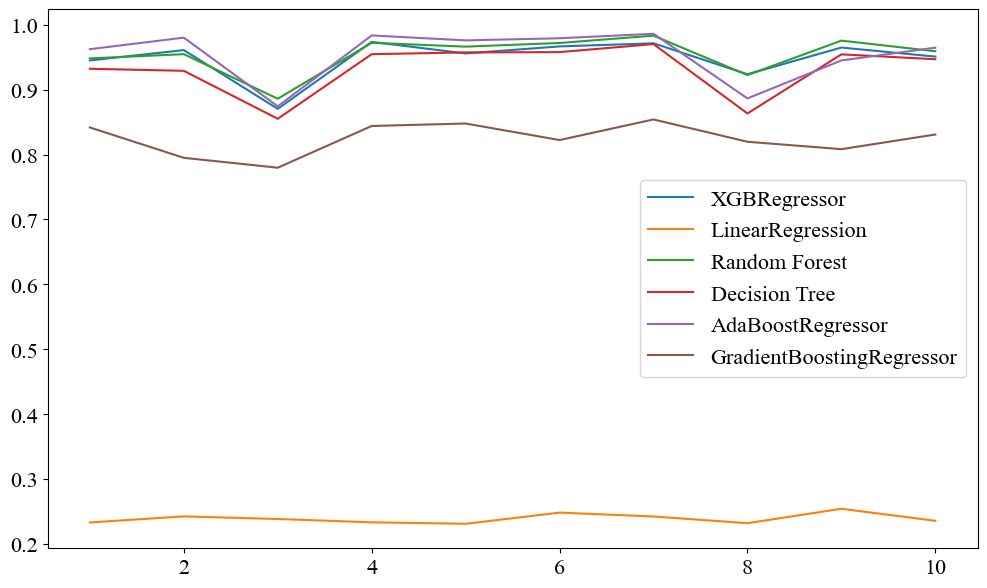

In [46]:
#不同模型的表现,
cv = KFold(n_splits=10, shuffle=True, random_state=1210)
plt.rcParams['font.size']= 16
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.figure(figsize=(12,7))
plt.plot(range(1,11), cross_val_score(reg,X_train,y_train,cv=cv), label='XGBRegressor')
plt.plot(range(1,11), cross_val_score(lr,X_train,y_train,cv=cv), label='LinearRegression')
plt.plot(range(1,11), cross_val_score(rfr,X_train,y_train,cv=cv), label='Random Forest')
plt.plot(range(1,11), cross_val_score(dt,X_train,y_train,cv=cv), label='Decision Tree')
plt.plot(range(1,11), cross_val_score(abr,X_train,y_train,cv=cv), label='AdaBoostRegressor')
plt.plot(range(1,11), cross_val_score(gbdt,X_train,y_train,cv=cv), label='GradientBoostingRegressor')
plt.legend()
plt.show()

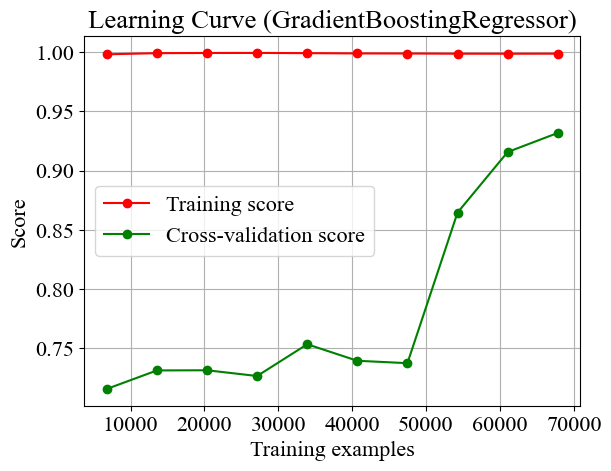

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):

    plt.figure()
    plt.title(f"Learning Curve ({estimator.__class__.__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt


estimator = best_model

plot_learning_curve(estimator, X, y).show()

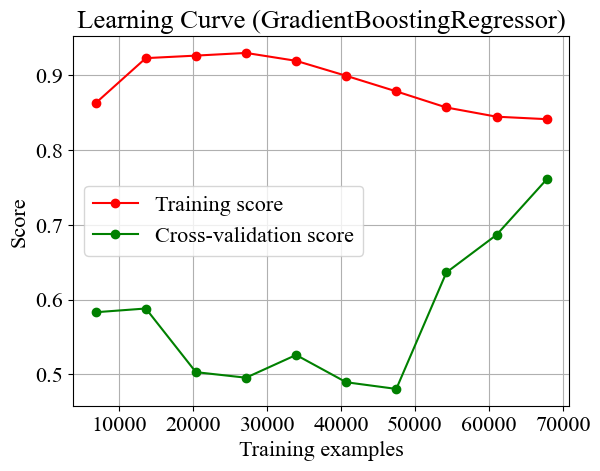

In [59]:
plot_learning_curve(gbdt, X, y).show()

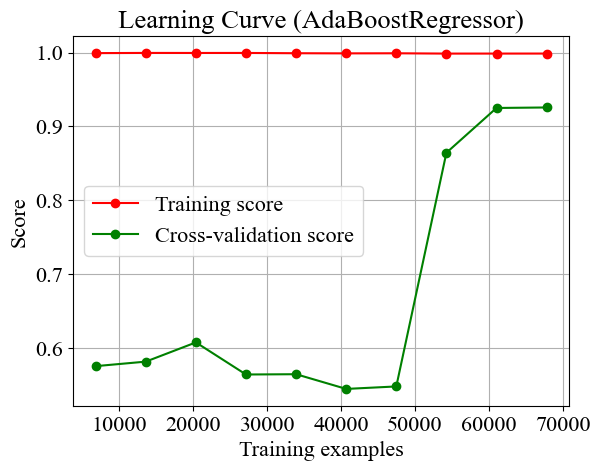

In [65]:
plot_learning_curve(abr, X, y).show()

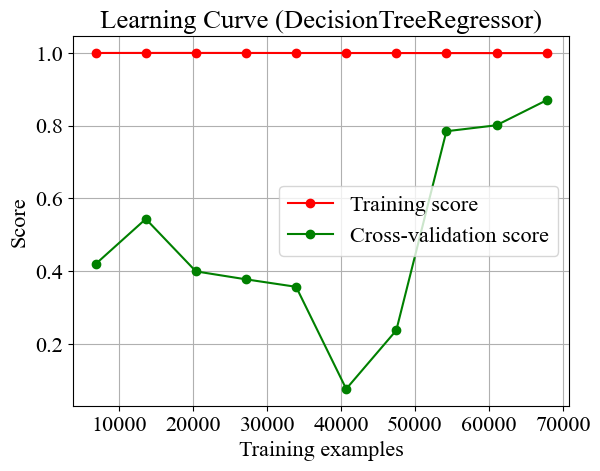

In [63]:
plot_learning_curve(dt, X, y).show()

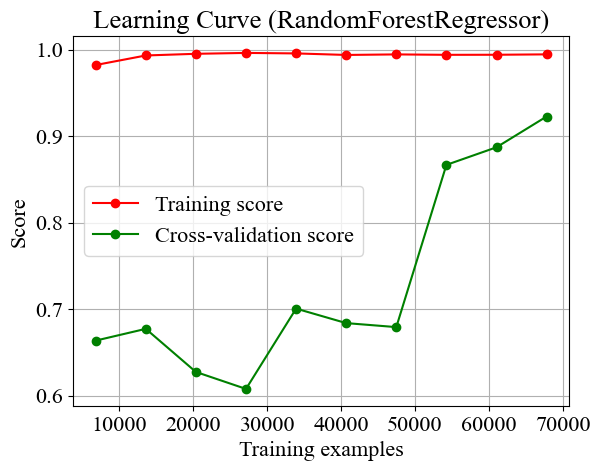

In [67]:
plot_learning_curve(rfr, X, y).show()

800 0.9503213923438878 0.0007519055895049824
350 0.9501617977612046 0.0007398874822525843
650 0.9503083575717545 0.0007434613282603406 0.0032127206554769523


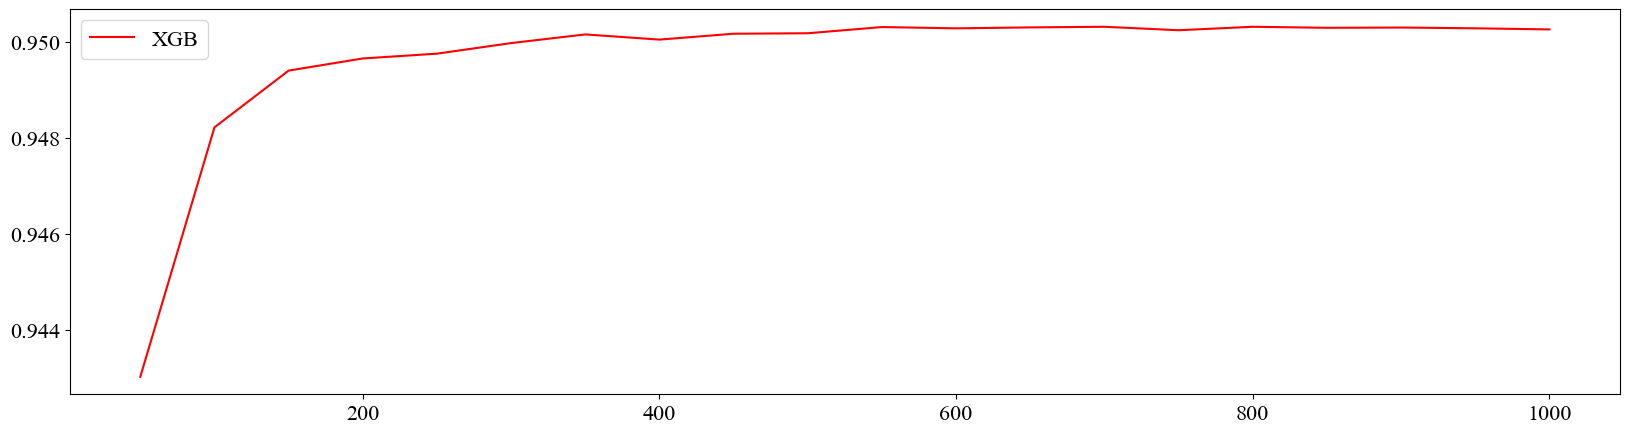

In [20]:
#xgb部分
axisx=range(50,1050,50)
var =[]
ge =[]
rs=[]
for i in axisx:
    reg=XGBRegressor(n_estimators=i,random_state=1210)
    cvresult =cross_val_score(reg,X_train,y_train,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())
    #打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛比误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red" ,label="XGB")
plt.legend()
plt.show()

800 0.9503213923438878 0.0007519055895049824
350 0.9501617977612046 0.0007398874822525843
650 0.9503083575717545 0.0007434613282603406 0.0032127206554769523


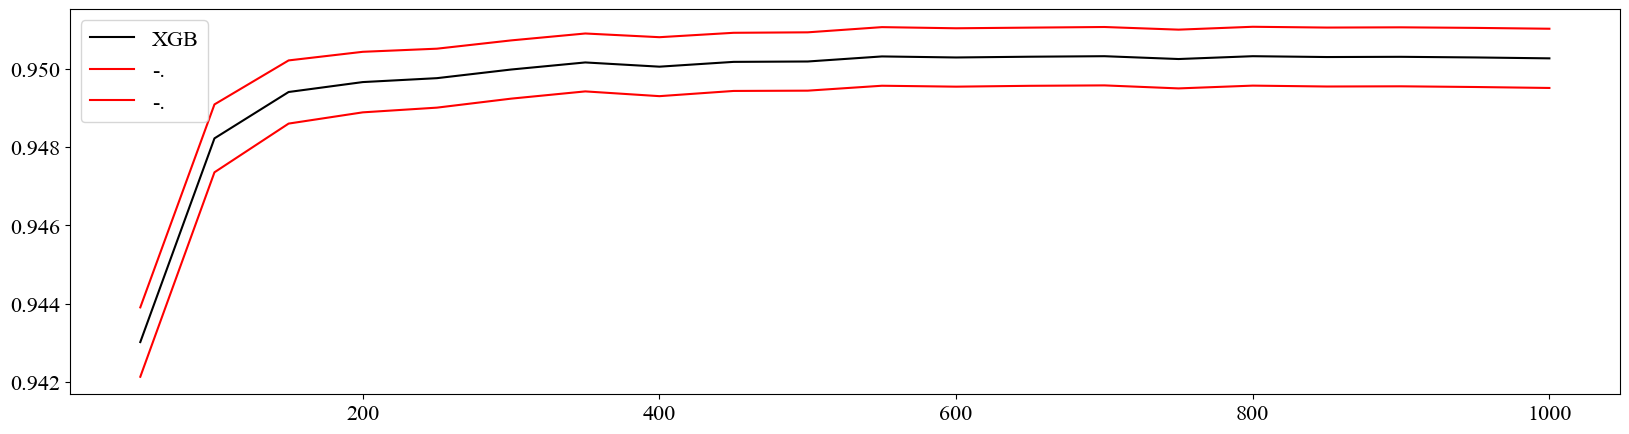

In [76]:
axisx=range(50,1050,50)
var =[]
ge =[]
rs=[]
for i in axisx:
    reg=XGBRegressor(n_estimators=i,random_state=1210)
    cvresult =cross_val_score(reg,X_train,y_train,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1-cvresult.mean())**2+cvresult.var())
    #打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛比误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs=np.array(rs)
var=np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black" ,label="XGB")
plt.plot(axisx,rs+var,c="red" ,label="-.")
plt.plot(axisx,rs-var,c="red" ,label="-.")
plt.legend()
plt.show()

In [138]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import randint
x=XGBRegressor(n_estimators=650,random_state=1210)
x.fit(X_train,y_train)
y_pred = x.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))

Test R² score: 0.98


In [78]:
#重要的特征
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
features=X.columns
importances = xgb_sg.feature_importances_
feature_importances = list(zip(features,importances))
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)
for i in feature_importances:
    print(f"Veriable: {i[0]:40} \t Importance: {round(i[1],2)}")


Veriable: 楼层高低_地下室                                 	 Importance: 0.27000001072883606
Veriable: 总楼层数                                     	 Importance: 0.11999999731779099
Veriable: 官方核验                                     	 Importance: 0.09000000357627869
Veriable: 区_雁塔                                     	 Importance: 0.07000000029802322
Veriable: 卫数                                       	 Importance: 0.05999999865889549
Veriable: 街道                                       	 Importance: 0.05000000074505806
Veriable: 区_高陵                                     	 Importance: 0.029999999329447746
Veriable: 朝向                                       	 Importance: 0.029999999329447746
Veriable: 精装                                       	 Importance: 0.029999999329447746
Veriable: 集中供暖                                     	 Importance: 0.029999999329447746
Veriable: 室数                                       	 Importance: 0.019999999552965164
Veriable: 楼层高低_低楼层                                 	 Importa

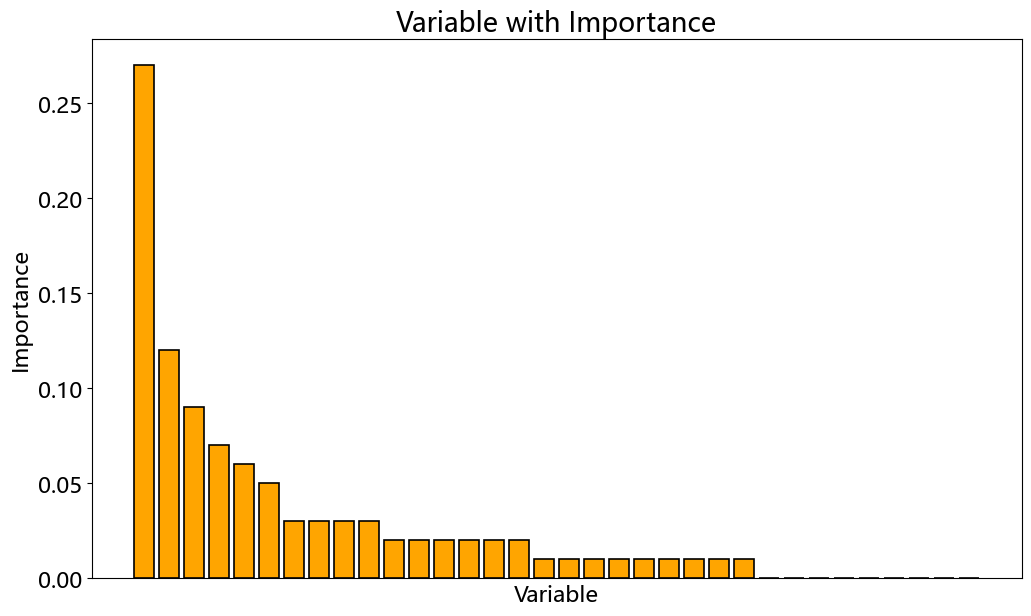

In [80]:
import numpy as np
import matplotlib.pyplot as plt

tolerance = 1e-6

# 使用列表推导式筛选出重要性非零（不在容差范围内接近于零）的项
filtered_feature_importances = [i for i in feature_importances if not np.isclose(i[1], 0.0, atol=tolerance)]

# 生成 x_value 和 y_value
x_value = [i[0] for i in filtered_feature_importances]
y_value = [round(float(i[1]), 2) for i in filtered_feature_importances]  # 转换为 float 并四舍五入到小数点后两位

# 绘图代码
plt.figure(figsize=(12, 7), dpi=100)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置支持中文的字体
plt.bar(x_value, y_value, color='orange', edgecolor='black', linewidth=1.2)

plt.xlabel('Variable')
plt.xticks([]) 
plt.ylabel('Importance')
plt.title("Variable with Importance")
plt.show()

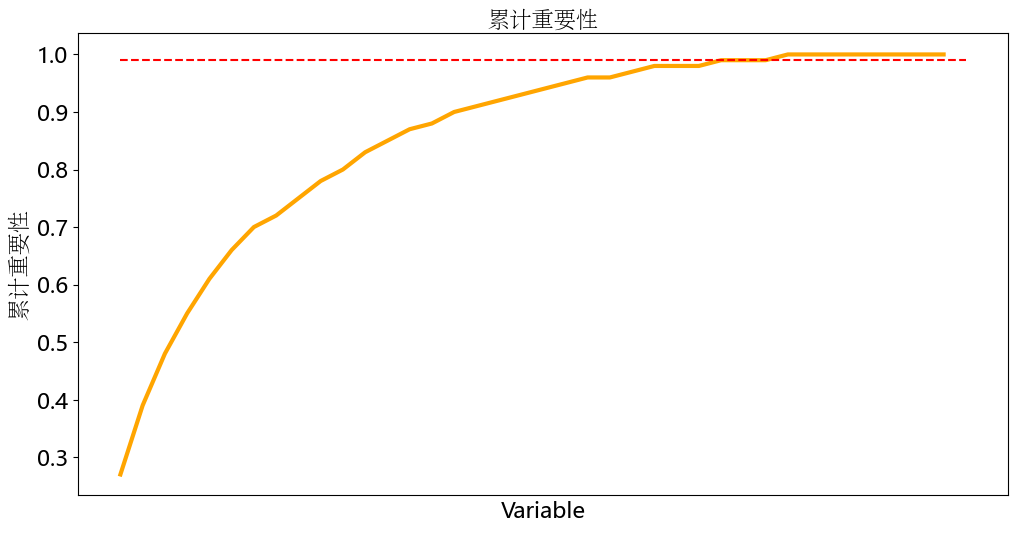

In [82]:

tb = pd.DataFrame(feature_importances,columns=['varible','importance'])
tb['cum_importance'] = tb['importance'].cumsum().round(2)

x_value = [i[0] for i in feature_importances]
y_value = [round(i[1],2) for i in feature_importances]

plt.figure(figsize=(12,6),dpi=100)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.plot(tb['varible'],tb['cum_importance'] , color='orange',linewidth=3)
plt.hlines(y=0.99, xmin=0, xmax=len(x_value),colors='red',linestyles='dashed')
plt.xlabel('Variable')
plt.xticks([]) 
plt.ylabel("累计重要性",fontproperties='STsong')
plt.title("累计重要性",fontproperties='STsong')
plt.show()

In [86]:
importances_feature_name = tb[tb['cum_importance'] < 0.99]['varible'].tolist()
importances_feature_name

['楼层高低_地下室',
 '总楼层数',
 '官方核验',
 '区_雁塔',
 '卫数',
 '街道',
 '区_高陵',
 '朝向',
 '精装',
 '集中供暖',
 '室数',
 '楼层高低_低楼层',
 '区_莲湖',
 '厅数',
 '独立卫生间',
 '近地铁',
 '区_碑林',
 '租赁方式_合租',
 '随时看房',
 '区_临潼',
 '楼层高低_高楼层',
 '双卫生间',
 '区_未央',
 '区_灞桥',
 '拎包入住',
 '区_西咸新区（西安）',
 '新上']

In [26]:
#GBDT部分
gbdt=GradientBoostingRegressor(random_state=1210)
cross_val_score(gbdt,X_train,y_train,cv=cv).mean()


0.8242259648470472

In [27]:
2

2

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor # 
from sklearn.model_selection import cross_validate, KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.linear_model import LinearRegression as LinearR
import datetime

In [11]:
#gbdt模型的贝叶斯优化
import numpy as np
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.early_stop import no_progress_loss
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import make_regression  # 假设您使用这个函数来生成数据

def hyperopt_objective(params):
    rbg = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['lr'],
        criterion=params['criterion'],
        loss=params['loss'],
        max_depth=int(params['max_depth']),
        max_features=params['max_features'],
        min_impurity_decrease=params['min_impurity_decrease'],
        random_state=1210,
        verbose=False,
    )
    cv = KFold(n_splits=5,shuffle=True, random_state=1210)
    valiadtion_loss = cross_validate(
            rbg, X, y, scoring='neg_root_mean_squared_error',
            cv=cv,verbose=False,n_jobs=-1,error_score='raise',
    )
    mean_loss = np.mean(abs(valiadtion_loss['test_score']))
    return mean_loss

param = {
    'n_estimators': hp.quniform('n_estimators',25, 200, 25),
    "lr": hp.quniform('learning_rate',0.01,3.0, 0.05),
    'criterion': hp.choice('criterion',['friedman_mse','squared_error']),
    'loss': hp.choice("loss",['squared_error','absolute_error','huber','quantile']),
    'max_depth': hp.quniform('max_depth',2,30,2),
    'subsample': hp.quniform('subsample',0.1,0.8,0.1),
    'max_features': hp.choice("max_features", ['log2','sqrt',16,32,64]),
    'min_impurity_decrease': hp.quniform('min_impurity_decrease',0,5,1)
} 

def param_hyperopt(max_evals=200):
    trials = Trials()  # 保存每次迭代的结果
    early_stop_fn = no_progress_loss(50)  # 设置提前停止机制,如果连续50次都没改进,就停止

    best_params = fmin(
        fn=hyperopt_objective,  # 目标函数
        space=param,  # 参数空间
        algo=tpe.suggest,  # 使用TPE算法进行优化
        max_evals=max_evals,
        verbose=True,  # 关闭每次迭代的信息
        trials=trials,  # 记录每次迭代的信息
        early_stop_fn=early_stop_fn  # 提前停止机制,
    )
    print(f"Best Parameters found\n{best_params}")
    best_params['criterion'] = ['friedman_mse',
                                'squared_error'][best_params['criterion']]
    best_params['loss'] = [
        'squared_error', 'absolute_error', 'huber', 'quantile'
    ][best_params['loss']]
    best_params['max_features'] = ['log2','sqrt',16,32,64][best_params['max_features']]
    print(f"转换后的参数组合为: {best_params}")
    return best_params, trials
# 运行超参数优化
best_params, trials = param_hyperopt()

 64%|████████████████████████████▊                | 128/200 [1:37:42<54:57, 45.80s/trial, best loss: 5.844191422143153]
Best Parameters found
{'criterion': 0, 'learning_rate': 0.05, 'loss': 0, 'max_depth': 24.0, 'max_features': 1, 'min_impurity_decrease': 3.0, 'n_estimators': 200.0, 'subsample': 0.6000000000000001}
转换后的参数组合为: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 24.0, 'max_features': 'sqrt', 'min_impurity_decrease': 3.0, 'n_estimators': 200.0, 'subsample': 0.6000000000000001}


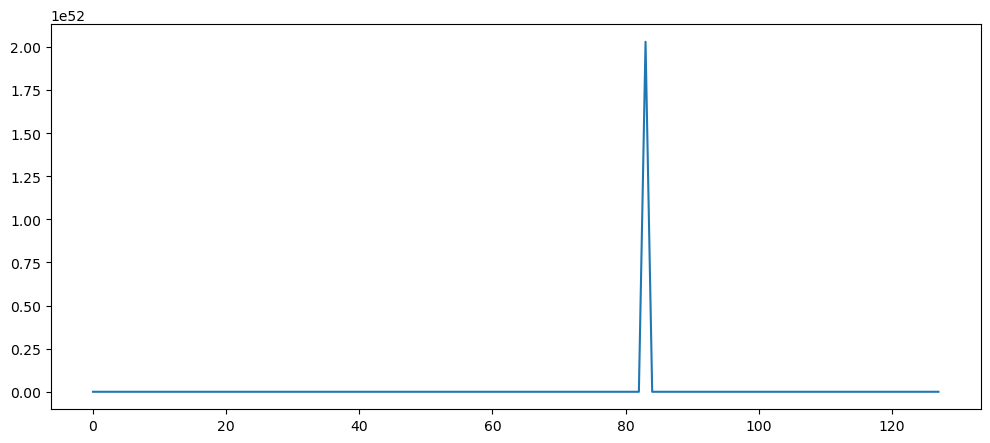

In [14]:
#gbdt优化过程绘制一个关于迭代次数和某种“最终损失”（finall_loss）的图表
tb1 = pd.DataFrame([i['result'] for i in trials.trials])
tb1.columns = ['finall_loss', 'statues']
tb2 = pd.DataFrame([i['misc']['vals'] for i in trials.trials])
tb = pd.concat([tb1,tb2],axis=1)
plt.figure(figsize=(12,5),dpi=100)
plt.plot(range(tb.shape[0]),tb['finall_loss'])
plt.show()

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
best_params={'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 24, 'max_features': 'sqrt', 'min_impurity_decrease': 3.0, 'n_estimators': 200, 'subsample': 0.6000000000000001}
best_model = GradientBoostingRegressor(**best_params)

# 训练模型
best_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=24, max_features='sqrt',
                          min_impurity_decrease=3.0, n_estimators=200,
                          subsample=0.6000000000000001)

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 使用验证集进行预测
y_pred = best_model.predict(X_test)

# 计算RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Validation RMSE: {rmse}")
from sklearn.model_selection import cross_val_score

# 使用交叉验证评估模型
cv_scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
# 注意：scoring='neg_mean_squared_error'返回的是负MSE，所以我们需要取其相反数来得到MSE
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE scores: {cv_rmse_scores}")
print(f"Mean cross-validated RMSE: {cv_rmse_scores.mean()}")

Validation RMSE: 4.622043193696344
Cross-validated RMSE scores: [6.97316129 7.01421738 4.79433648 8.85353067 5.47679289]
Mean cross-validated RMSE: 6.622407740564415


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

R² score: 0.9811


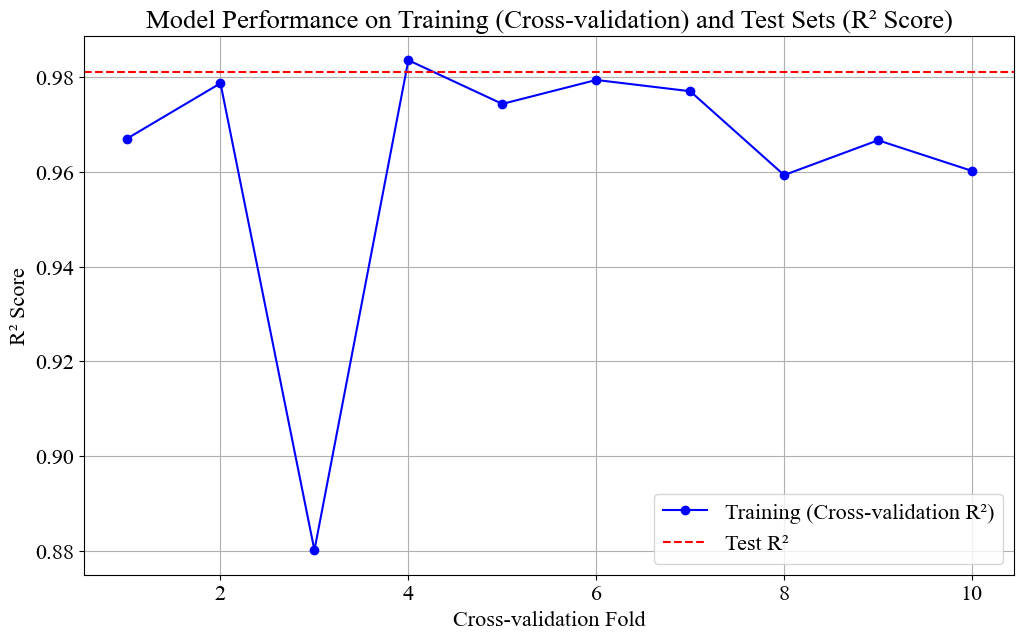

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

cv = KFold(n_splits=10, shuffle=True, random_state=1210)
train_r2_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='r2')

y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

folds = range(1, len(train_r2_scores) + 1)

plt.rcParams['font.size'] = 16
plt.rcParams['font.sans-serif'] = ['Times New Roman']  
plt.figure(figsize=(12, 7))
plt.plot(folds, train_r2_scores, 'o-', label='Training (Cross-validation R²)', color='b')
plt.axhline(y=test_r2, color='r', linestyle='--', label='Test R²')

plt.legend()
plt.title('Model Performance on Training (Cross-validation) and Test Sets (R² Score)')
plt.xlabel('Cross-validation Fold')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()

2